In [ ]:
## Assignment :- Multi linear regression

In [1]:
## Problem statement
##Building the model for the dependent variables profit with the help 
## of indipendent variables of the data 50_Startsup

In [2]:
## calling the laibreries thats are use for better model building
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Loading the data set
startup1=pd.read_csv('50_startups.csv')

In [4]:
## Chaking the shape of the data
startup1.shape

(50, 5)

In [5]:
## Chaking the null values & Data types
startup1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
## discription of the data
startup1.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
## Head of the data
startup1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
## Chaking the tail
startup1.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


## EDA Of the Data set

In [9]:
## chaking the feature state is dependent on target or not as this is object data type 

In [10]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
startup1['State']= label_encoder.fit_transform(startup1['State'])
startup1['State'].unique()

array([2, 0, 1])

In [11]:
startup1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [12]:
## Chaking whether the state dependt or not on target by using scatter plot
x1=startup1['State']
y1=startup1['Profit']

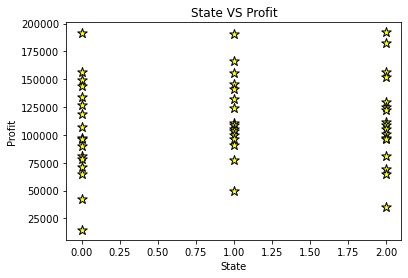

In [13]:
plt.scatter(x1, y1, c ="yellow", linewidths = 1, marker ="*", edgecolor ="black", s = 100)
plt.title("State VS Profit")
plt.xlabel("State")
plt.ylabel("Profit")
plt.show()

## from above No relationship between state and profit so we can drop the colum

In [14]:
## Droping the colum 
startup2=startup1.drop('State',axis=1)

In [15]:
startup2.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


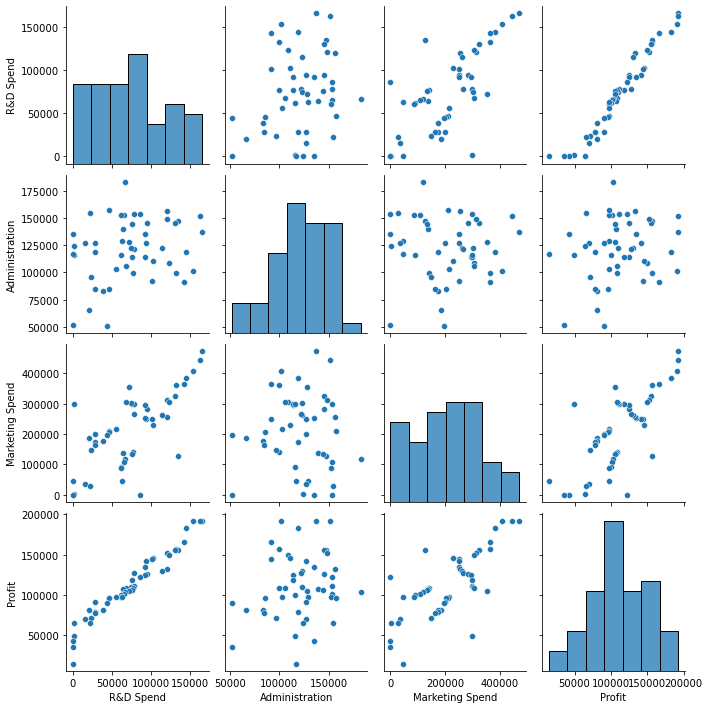

In [16]:
## Chaking correlation using pairplot
sns.pairplot(startup2)

In [17]:
## chaking corelation using corelation matrix
startup2.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

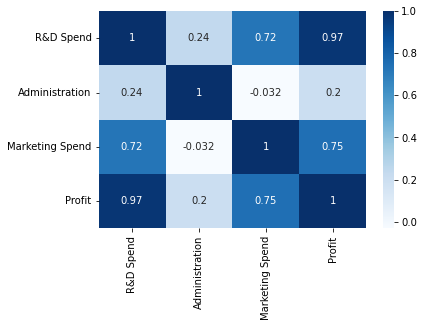

In [18]:
## heat map
corr = startup2.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

## Graphical represntation

## From above observation there is strong multicolinaroty between R&D spend & Marketing  spend so it's need to check for further chaking

In [19]:
## chaking for outlires

In [20]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

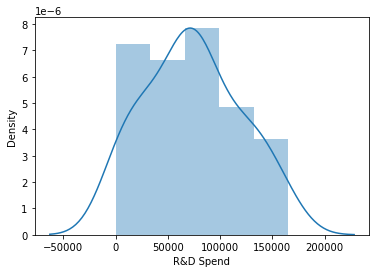

In [21]:
## Histogram of R&D Spend
sns.distplot(startup2['R&D Spend'])

<AxesSubplot:xlabel='R&D Spend'>

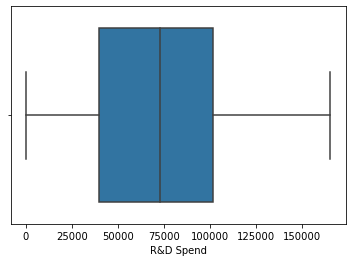

In [22]:
## boxplot  of R&D Spend
sns.boxplot(startup2['R&D Spend'])

## From above observation there are no outliers in R&D Spend

<AxesSubplot:xlabel='Administration', ylabel='Density'>

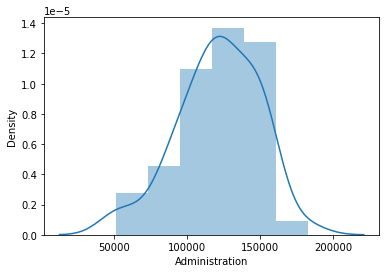

In [23]:
## histogram of Administration
sns.distplot(startup2['Administration'])

<AxesSubplot:xlabel='Administration'>

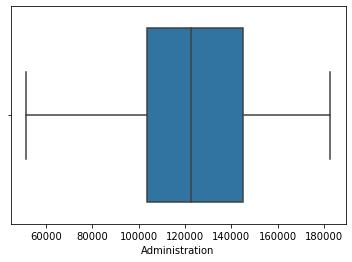

In [24]:
##Boxplot for Administration
sns.boxplot(startup2['Administration'])

## From above there are no outlires in the colum Administration

<AxesSubplot:xlabel='Marketing Spend', ylabel='Density'>

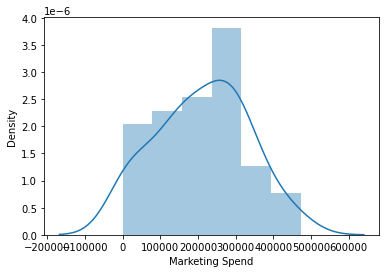

In [25]:
## Histogram of Marketing Spend
sns.distplot(startup2['Marketing Spend'])

<AxesSubplot:xlabel='Marketing Spend'>

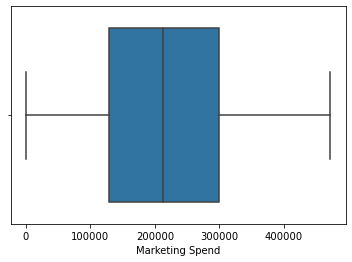

In [26]:
## Boxplot of Marketing Spend
sns.boxplot(startup2['Marketing Spend'])

<AxesSubplot:xlabel='Profit', ylabel='Density'>

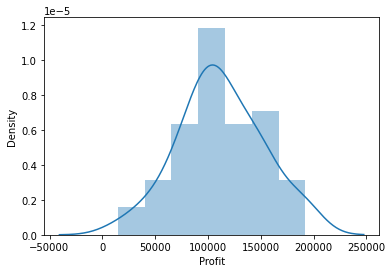

In [27]:
## Chaking the histogram of Profit
sns.distplot(startup2['Profit'])

## From above there are no outliers in the colum Marketing Spend

In [28]:
l=startup2['R&D Spend']
m=startup2['Administration']
n=startup2['Marketing Spend']
y=startup2['Profit']

# Building the model

In [29]:
## Building the 1st model
import statsmodels.formula.api as smf 

In [30]:
model1=smf.ols(formula="y ~ m + n+ l", data=startup2).fit()

In [31]:
#Coefficients
model1.params

Intercept    50122.192990
m               -0.026816
n                0.027228
l                0.805715
dtype: float64

## From above B0=50122.19290,B1=-0.026816,B2=0.027228,B3=0.805715

In [32]:
#t and p-Values
print(model1.tvalues, '\n', model1.pvalues)

Intercept     7.626218
m            -0.525507
n             1.655077
l            17.846374
dtype: float64 
 Intercept    1.057379e-09
m            6.017551e-01
n            1.047168e-01
l            2.634968e-22
dtype: float64


## From above value we reject value of m&n as they are greater than 0.05 so we accept B=0

In [33]:
#R squared values
(model1.rsquared,model1.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [59]:
model1R2=model1.rsquared

In [34]:
## Chaking p&t values for individual features as heat map shows some relation between features
ml_v=smf.ols('y~l',data = startup2).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    19.320288
l            29.151139
dtype: float64 
 Intercept    2.782697e-24
l            3.500322e-32
dtype: float64


## l is important as the p value is less than 0.05

In [35]:
## chaking for m
ml_v=smf.ols('y~m',data = startup2).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    3.040044
m            1.419493
dtype: float64 
 Intercept    0.003824
m            0.162217
dtype: float64


## From above observation m is not importance as it is > 0.05

In [36]:
## cheking for n
ml_v=smf.ols('y~n',data = startup2).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    7.808356
n            7.802657
dtype: float64 
 Intercept    4.294735e-10
n            4.381073e-10
dtype: float64


## From above all we conclude that when we taking all features m&n values accepted null hypothesis i.e B=0 but when we checking  indidual value of p of features then m accept null hypothesis meanwhile l&n reject null hypothesis.
## This shows there is multicolenarity between features so we need to further evaluation by calculating VIF score

# Calculation of VIF

In [37]:
## calculating VIF score for better evaluation
rsq_l = smf.ols('l~m+n',data=startup2).fit().rsquared  
vif_l = 1/(1-rsq_l) 
## Vif for m
rsq_m = smf.ols('m~l+n',data=startup2).fit().rsquared  
vif_m = 1/(1-rsq_m) 
## vif for n
rsq_n = smf.ols('n~m+l',data=startup1).fit().rsquared  
vif_n = 1/(1-rsq_n) 
# Storing vif values in a data frame

d1 = {'Variables':['l','m','n'],'VIF':[vif_l,vif_m,vif_n]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame


,Variables,VIF
0,l,2.468903
1,m,1.175091
2,n,2.326773


In [38]:
## R2 value
d2 = {'Variables':['l','m','n'],'R2':[rsq_l,rsq_m,rsq_n]}
R2_frame = pd.DataFrame(d2)  
R2_frame

,Variables,R2
0,l,0.594962
1,m,0.149002
2,n,0.570220


## Model evaluation

## Residual Analysis Test for Normality of Residuals (Q-Q Plot)

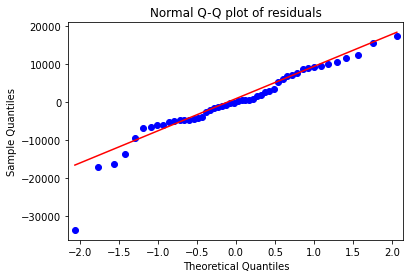

## From above our model is not correct as this graph is not linear

## Residual Plot for Homoscedasticity

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

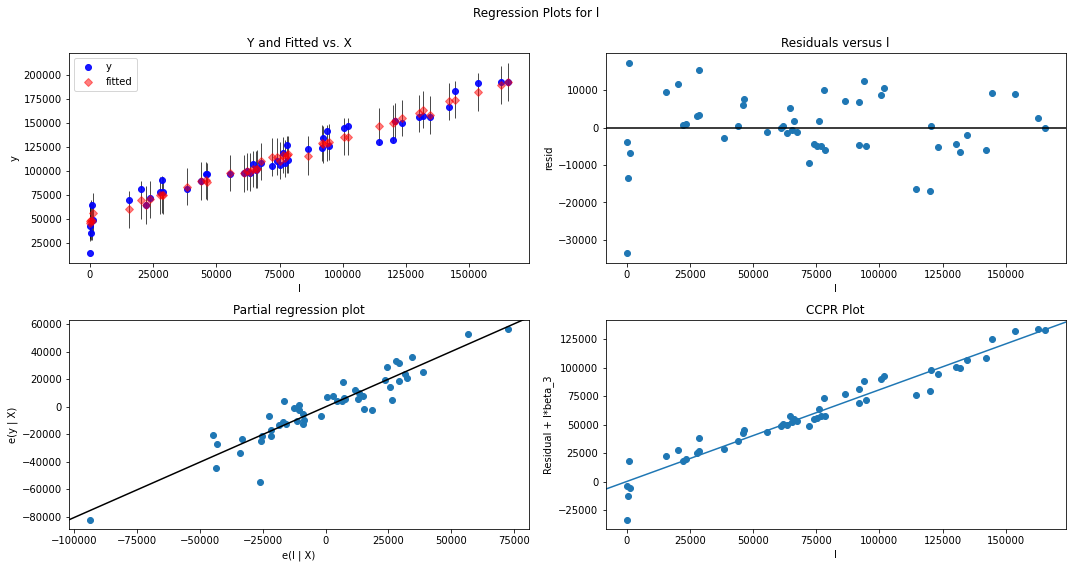

In [40]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "l", fig=fig)
plt.show()

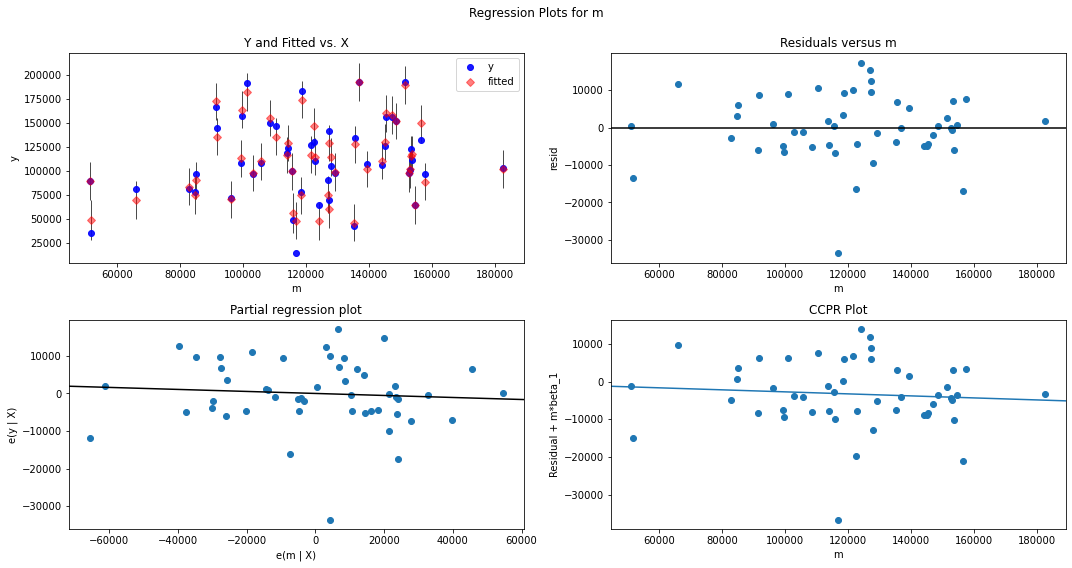

In [41]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "m", fig=fig)
plt.show()

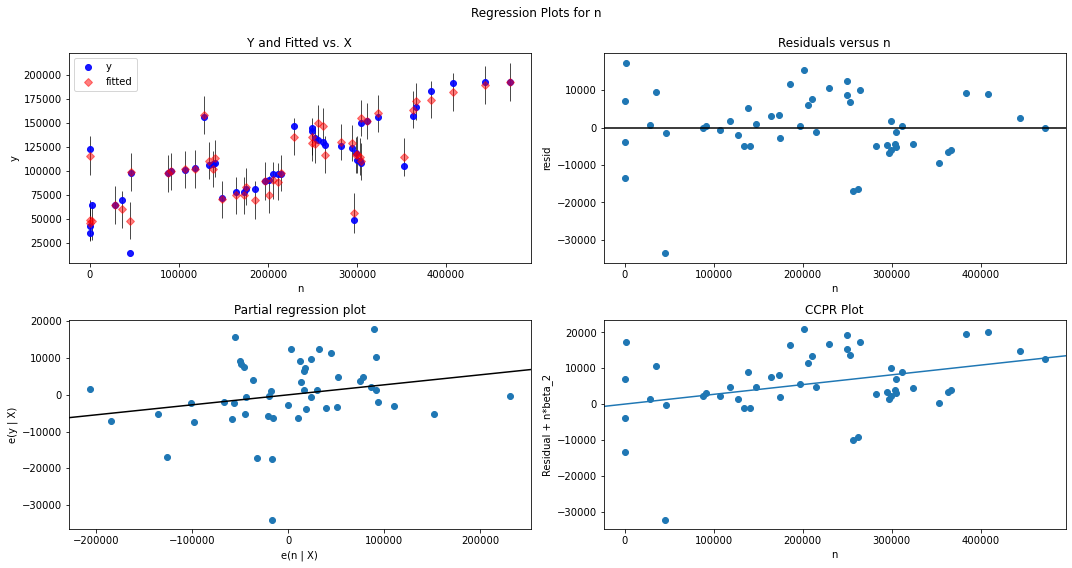

In [42]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "n", fig=fig)
plt.show()

## Cook’s Distance

In [43]:
model1_influence = model1.get_influence()
(c, _) = model1_influence.cooks_distance

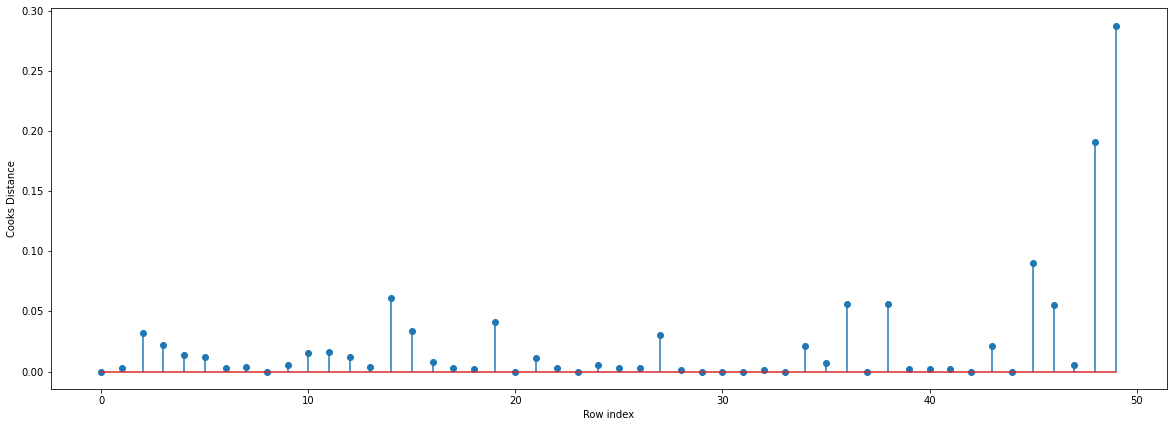

In [44]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

## From above observation conclusion is that our model1 is not good due to following reasons
## A) Q-Q plot is not linear
## B)homoscadacity is not homogenous
## it means there is multicolinearity between features which we early known through corelation matrix
## so we need to build diffrent model

# Model2

In [45]:
import statsmodels.formula.api as smf 
model2=smf.ols(formula="y ~ m +  l", data=startup2).fit()

In [46]:
#Coefficients
model2.params

Intercept    54886.620628
m               -0.052995
l                0.862118
dtype: float64

In [47]:
#t and p-Values
print(model2.tvalues, '\n', model2.pvalues)

Intercept     9.122352
m            -1.072677
l            28.588870
dtype: float64 
 Intercept    5.695336e-12
m            2.888932e-01
l            2.278348e-31
dtype: float64


In [48]:
#R squared values
(model2.rsquared,model2.rsquared_adj)

(0.9478129385009173, 0.9455922124796797)

In [72]:
model2R2=model2.rsquared

In [49]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           7.29e-31
Time:                        19:30:04   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
m             -0.0530      0.049     -1.073      0.289      -0.152       0.046
l              0.8621      0.030     28.589      0.000       0.801       0.923
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model3

In [50]:
model3=smf.ols(formula="y ~ m +  n", data=startup2).fit()

In [51]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           2.50e-10
Time:                        19:30:09   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
m              0.3237      0.131      2.468      0.017       0.060       0.588
n              0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
model3R2=model3.rsquared

In [52]:
## There is multi colenarity between features so build the model using indidual features
model4=smf.ols(formula="y ~ m ", data=startup2).fit()

In [53]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 30 Mar 2022   Prob (F-statistic):              0.162
Time:                        19:30:11   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
m              0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
model4R2=model4.rsquared

## Final conclusion for m is not important for the model building as value of R2 is to less

In [54]:
model5=smf.ols(formula="y ~ l", data=startup2).fit()

In [55]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           3.50e-32
Time:                        19:30:16   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
l              0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
model5R2=model5.rsquared

In [56]:
model6=smf.ols(formula="y ~ n", data=startup2).fit()

In [57]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           4.38e-10
Time:                        19:30:18   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
n              0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
model6R2=model6.rsquared

In [75]:
## R2 table of every model
d3 = {'Models':['mod1','mod2','mod3','mod4','mod5','mod6'],'R2':[model1R2,model2R2,model3R2,model4R2,model5R2,model6R2]}
R2_frame = pd.DataFrame(d3)  
R2_frame

,Models,R2
0,mod1,0.950746
1,mod2,0.947813
2,mod3,0.609723
3,mod4,0.040287
4,mod5,0.946535
5,mod6,0.559154


# Final conclusion

## from above table the conclusion is that

## 1) model1 has large r2 value but in this model there is strong multicolenearity between features so we can not used this model

## 2) model2 has good value of R2 but its shows zero value of coeficent of administration so profit is totally depends on the value of R&D Spend

## 3)Model3 is better model as its R2 is better but it is totally depends on Marketing spend as  coeficent of administration is 0

## 4)Model4 is wrost as its R2 value is wrost

## 5)Model5 is good but it depend on only one feture i.e R&D Spend

## 6)Model6 is OK as its R2 score is aceptable